<a href="https://colab.research.google.com/github/Samsonite27/Samsonite27.github.io/blob/main/Projects/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
np.random.seed(42)
rd.seed(42)

def polynomial(coefficients, input):
  sum = 0

  for i in range(len(coefficients)):
    sum += coefficients[i] * (input ** i)

  return sum

def MSE(points, coefficients):

  n = len(points)
  sum = 0

  for i in range(len(points)):
    sum += (points[i][1] - polynomial(coefficients, points[i][0])) ** 2

  return 1/n * sum

def negative_gradient_polynomial(points, coefficients):

  grad = []

  for j in range(len(coefficients)):
    sum = 0
    for i in range(len(points)):
      sum += (points[i][0] ** j) * (points[i][1] - polynomial(coefficients, points[i][0]))
    grad.append(2 *sum/len(points))

  return grad

def gradient_descent(points, initial_coefficients, step_size, trials):

  coefficients = initial_coefficients
  mse_values = []
  coefficients_history = []


  for i in range(trials):
    gradient_vector = negative_gradient_polynomial(points, coefficients)
    coefficients = [coefficients[i] + gradient_vector[i] * step_size for i in range(len(coefficients))]

    mse_values.append(MSE(points, coefficients))
    coefficients_history.append(list(coefficients))

  return (coefficients, mse_values, coefficients_history)


# Gradient Descent
Machine learning stripped to the bare bones, is a family of clever methods to given some observations, attempt to model the unknown processes that go on behind. If you want to be really reductionist, find a suitable function my data was generated from.

The normal process goes like this:
- I have some phenomena I want to understand and some observations generated by it.
- I separate my data into a train and test set.
- Then I use learning techniques on my train set.
- I then evaluate the effectiveness of my model using my test set.

Repeat, adjusting learning techniques to better explain phenomenon.

Machine learning methods differ but they are all interested in how well does a paticular model fit the data. We use a *cost function* to quantify this. The often times most appropriate *cost function* is the *mean-squared error* function. It calculates for every data point the square of the distance between where a model thinks a data point should be and where it actually is. Intuitively, this function would prefer that a few points were a bit off than one point being miles off. It can be thought of to average the error.

Any model takes parametres, in our example today we are going to look at polynomial regression. Where the parametres are the coefficients of one variable polynomial.

We want to minimise this cost function, because doing so would mean we have the best possible parametres for our model.

Consider a model, $\mathcal{M}: \mathbb{R} → \mathbb{R}$, let $\mathcal{M} \in \mathcal{P}_n = \{p \in \mathbb{F}[x] \text{ | deg(p)} \leq n \}$

Then there exists some $(a_0, a_1, \dots, a_n), \text{ where } a_i \in \mathbb{R}$.

That define $\mathcal{M} = a_0 + a_1x + a_2x^2 + \dots a_nx^n$

For each model, let's define some mean error squared function.

Given some sample data, define
$\text{MSE}((x_i, y_i)^k_{i = 1}, \mathcal{M}) =  \frac{1}{n} \sum_{i=1}^k (y_i - \mathcal{M}(x_i))^2$

For a specific set of data, the MSE is a function of just its parametres, $\text{MSE}(a_0, a_1, a_2, \dots, a_n )$

We can calculate $∇\text{MSE}$, this is the gradient function.

This is a vector that returns the direction for the steepest rate of descent at any point. So if we 'walk down' the surface in the opposite direction, we are following the path of steepest descent.

In this case we can solve gradient explicitly, but in general we require numerical differentiation techniques to obtain.

$\text{MSE}_{a_j} = -\frac{2}{n} \sum_{i=1}^n x_i^j \left(y_i - \sum_{k=1}^m a_k x_i^k \right)$

Then we can write write a gradient descent function to find locally minimal values of $a_0, ..., a_n$


Lets consider a small data set, so we can visualise the surface of MSE.

We'll go a linear function so we can visualise the surface of the MSE for some fixed data. Lets consider three points in space. $(1, 2), (5, -1), (2, 3)$

Then the MSE function for these points is given:
$MSE = 14 - 8a_0 - 6a_1 + 16a_0a_1+3a_0^2+30a_1^2$
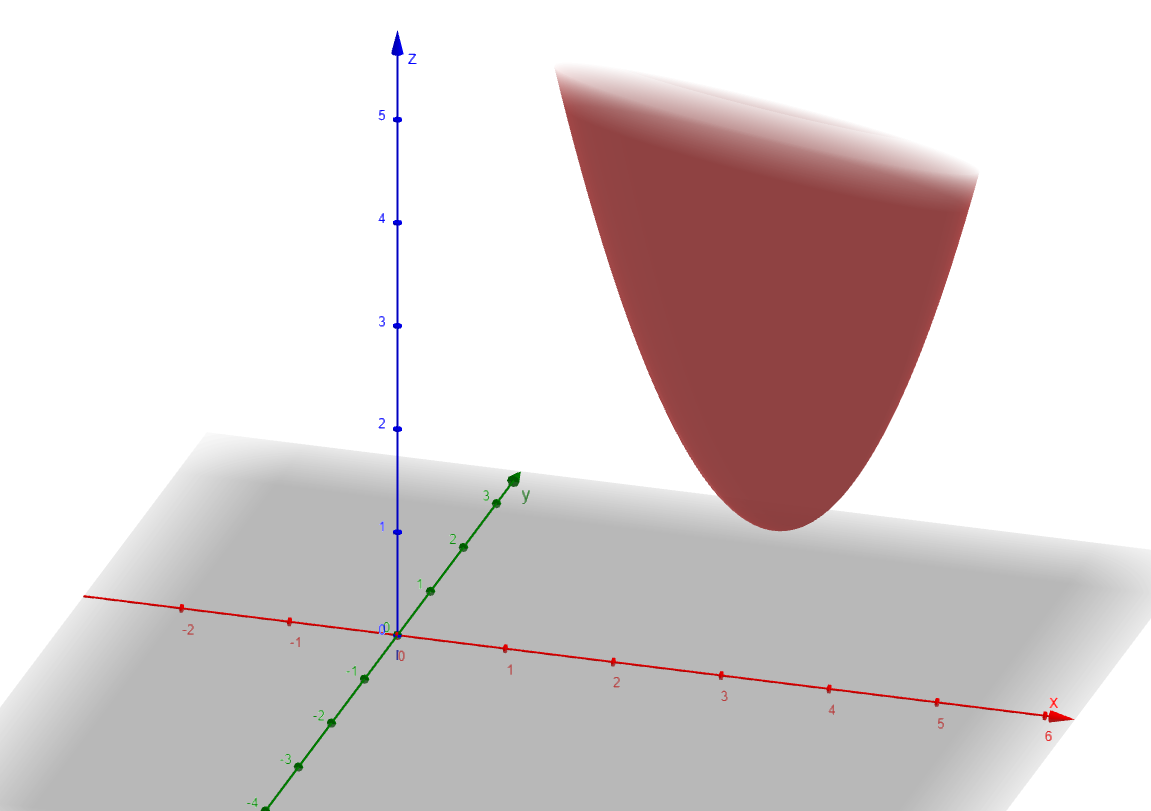




We start at some position, often randomised and move in the direction of the gradient vector, for some step size.

We call this step size the learning rate, and we iterate over a number of steps or until the gradient vector has approached zero.

Lets consider a coded solution and look at some practicalities.

[3.6757585343763584, -0.880080181332277]


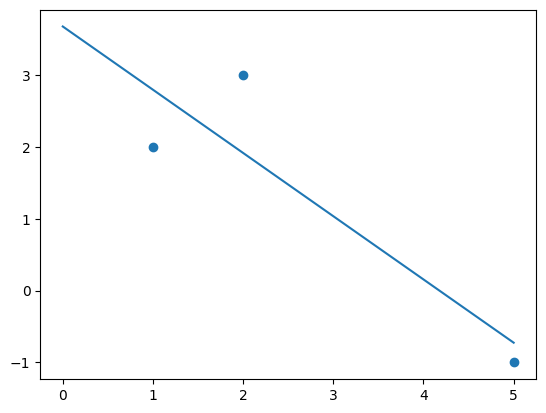

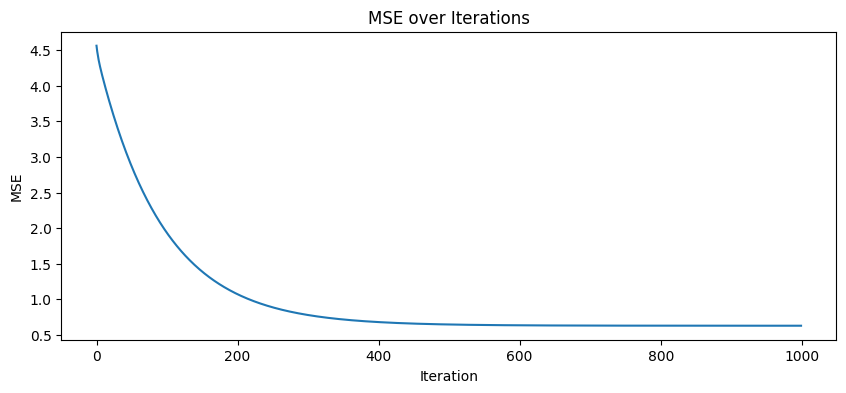

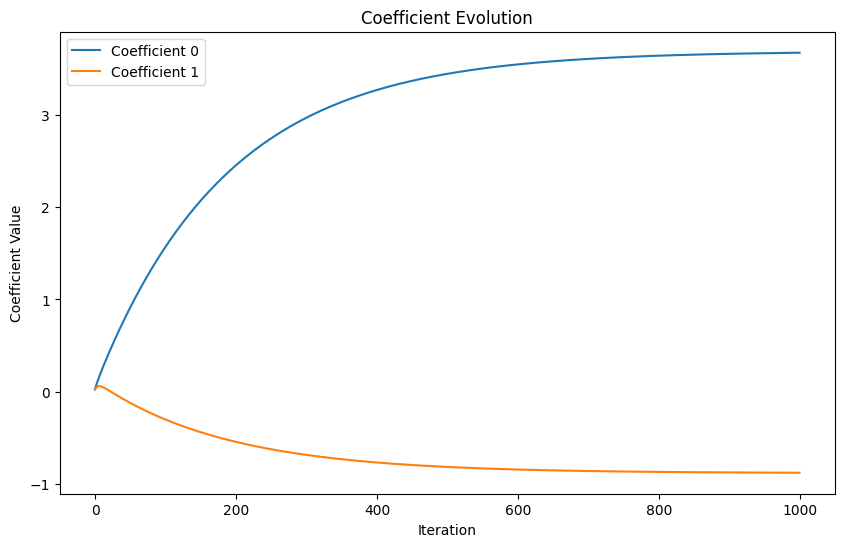

In [ ]:


coeff, mse_values, coeff_history = gradient_descent([[1, 2], [5, -1], [2, 3]], [0, 0], 0.01, 1000)

x = np.linspace(0, 5, 1000)
y = [polynomial(coeff, i) for i in x]

print(coeff)

plt.scatter([1, 5, 2], [2, -1, 3])
plt.plot(x, y)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(mse_values)
plt.title("MSE over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()

coeff_history = np.array(coeff_history)
plt.figure(figsize=(10, 6))
for i in range(coeff_history.shape[1]):
    plt.plot(coeff_history[:, i], label=f"Coefficient {i}")
plt.title("Coefficient Evolution")
plt.xlabel("Iteration")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()

Now some practicalities:

- Types of gradient descent
- Learning rate
  - Too large
  - Too small
  - Visualisation
- Convergence problems
- Stability issues

Solutions:

Momentum methods,
Adaptive learning,
Parallel random points


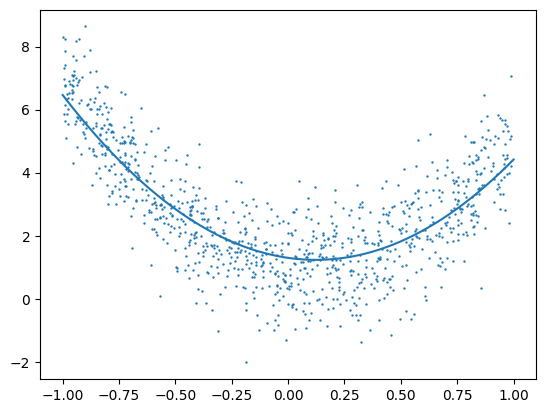

1.02637260901278
1.0850642125206411


In [ ]:
num_data_points = 1000

random_points = [rd.uniform(-1, 1) for i in range(num_data_points)]
data_points = [[x, 5*(x**2) - x + 1 + rd.normalvariate(0, 1)] for x in random_points]

x_val, y_val = zip(*data_points)

coeff, mse_values, coeff_history = gradient_descent(data_points, [0, 0, 0], 0.1, 100)
x = np.linspace(-1, 1, 1000)
y = [polynomial(coeff, i) for i in x]

plt.scatter(x_val, y_val, s = 0.5)
plt.plot(x, y)
plt.show()

print(MSE(data_points, [1, -1, 5]))
print(MSE(data_points, coeff))




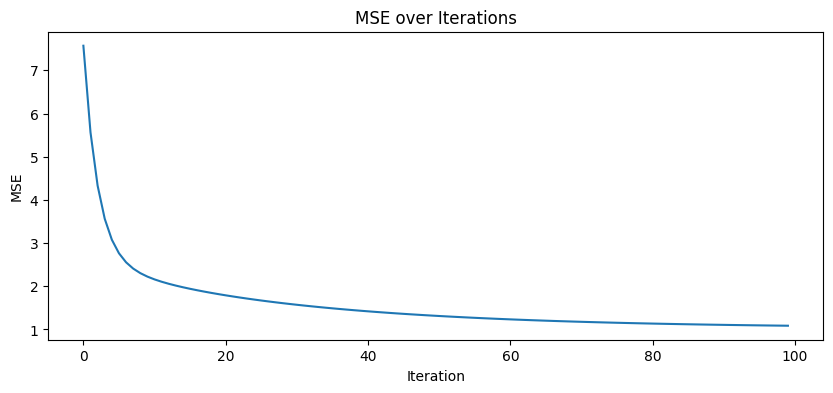

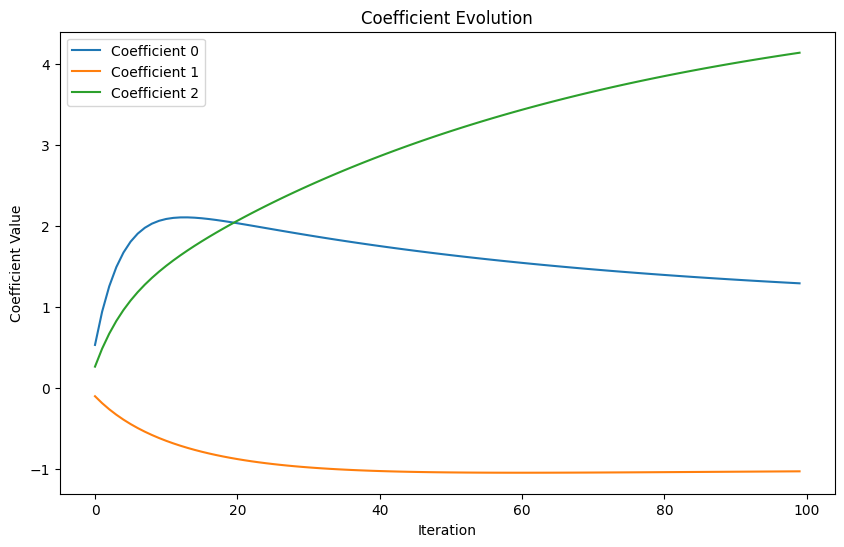

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(mse_values)
plt.title("MSE over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()

coeff_history = np.array(coeff_history)
plt.figure(figsize=(10, 6))
for i in range(coeff_history.shape[1]):
    plt.plot(coeff_history[:, i], label=f"Coefficient {i}")
plt.title("Coefficient Evolution")
plt.xlabel("Iteration")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()

In [ ]:
coeff, mse_values, coeff_history = gradient_descent([[1, 2], [5, -1], [2, 3]], [0, 0], 0.01, 1000)
print(coeff)

print(MSE([[1, 2], [5, -1], [2, 3]], coeff))
print(MSE([[1, 2], [5, -1], [2, 3]], [4, -1]))

[3.6757585343763584, -0.880080181332277]
0.6282843966128471
0.6666666666666666
